<a href="https://colab.research.google.com/github/NguyenHuynhNgoc20146187/AI/blob/main/Crabs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from sklearn import datasets
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


url = 'crabs.csv'
data = pd.read_csv(url)
data


,speies,sex,index,fontallip,rearwidth,length,width,depth
0,B,M,1,8.1,6.7,16.1,19.0,7.0
1,B,M,2,8.8,7.7,18.1,20.8,7.4
2,B,M,3,9.2,7.8,19.0,22.4,7.7
3,B,M,4,9.6,7.9,20.1,23.1,8.2
4,B,M,5,9.8,8.0,20.3,23.0,8.2
...,...,...,...,...,...,...,...,...
195,O,F,46,21.4,18.0,41.2,46.2,18.7
196,O,F,47,21.7,17.1,41.7,47.2,19.6
197,O,F,48,21.9,17.2,42.6,47.4,19.5
198,O,F,49,22.5,17.2,43.0,48.7,19.8


                 speies           sex         index  fontallip  rearwidth  \
speies     1.000000e+00 -1.587619e-16 -5.822357e-16  -0.437966  -0.315751   
sex       -1.587619e-16  1.000000e+00 -1.514059e-16   0.043309  -0.291597   
index     -5.822357e-16 -1.514059e-16  1.000000e+00   0.862876   0.840040   
fontallip -4.379655e-01  4.330897e-02  8.628756e-01   1.000000   0.906988   
rearwidth -3.157507e-01 -2.915970e-01  8.400401e-01   0.906988   1.000000   
length    -2.883330e-01  1.049828e-01  9.114357e-01   0.978842   0.892743   
width     -2.161801e-01  7.443726e-02  9.282481e-01   0.964956   0.900402   
depth     -4.237165e-01  8.971958e-02  8.644594e-01   0.987627   0.889205   

             length     width     depth  
speies    -0.288333 -0.216180 -0.423716  
sex        0.104983  0.074437  0.089720  
index      0.911436  0.928248  0.864459  
fontallip  0.978842  0.964956  0.987627  
rearwidth  0.892743  0.900402  0.889205  
length     1.000000  0.995023  0.983204  
width      0

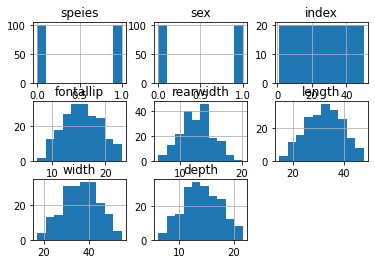

In [59]:
data.hist()
correlation=data.corr()
print(correlation)


In [60]:
data = data.replace(['M','B'],1)
data = data.replace(['F','O'],0)
data.head()

,speies,sex,index,fontallip,rearwidth,length,width,depth
0,1,1,1,8.1,6.7,16.1,19.0,7.0
1,1,1,2,8.8,7.7,18.1,20.8,7.4
2,1,1,3,9.2,7.8,19.0,22.4,7.7
3,1,1,4,9.6,7.9,20.1,23.1,8.2
4,1,1,5,9.8,8.0,20.3,23.0,8.2


<Axes: >

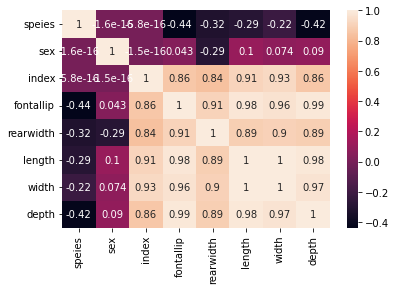

In [61]:
import seaborn as sas
corr = data.corr()
sas.heatmap(corr,annot = True)

In [62]:
X = data.drop(data.columns[[0,1,2]], axis = 1)
y = data['sex']
print(X[:5])
print(y[:5])

   fontallip  rearwidth  length  width  depth
0        8.1        6.7    16.1   19.0    7.0
1        8.8        7.7    18.1   20.8    7.4
2        9.2        7.8    19.0   22.4    7.7
3        9.6        7.9    20.1   23.1    8.2
4        9.8        8.0    20.3   23.0    8.2
0    1
1    1
2    1
3    1
4    1
Name: sex, dtype: int64


In [63]:
X_train, X_test ,y_train, y_test = train_test_split(X, y, test_size = 0.3)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [64]:
model = Perceptron(max_iter = 40, eta0 = 0.1, random_state = 0)
#max_iter: số lần học
#eta: tốc độ học
model.fit(X_train_std, y_train)
y_pred = model.predict(X_test_std)
print(y_pred)
print(y_test)
print('Do chinh xac cua mo hinh:', accuracy_score(y_test,y_pred))

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
#predict: tiên đoán giá trị
y_pred = model.predict(X_test).round(1)
calculation = pd.DataFrame(np.c_[y_test,y_pred], columns=['Onginal Profit','Predicted Profit'])
print('Do chinh xac cua train',model.score(X_train, y_train))
print('Do chinh xac cua test',model.score(X_test, y_test))

[1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 1 0
 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0]
0      1
128    1
164    0
53     0
22     1
7      1
134    1
166    0
121    1
122    1
14     1
54     0
143    1
114    1
78     0
87     0
12     1
123    1
38     1
191    0
81     0
56     0
119    1
31     1
98     0
147    1
153    0
43     1
182    0
93     0
176    0
141    1
90     0
103    1
161    0
110    1
170    0
169    0
179    0
94     0
88     0
186    0
19     1
187    0
130    1
35     1
29     1
44     1
52     0
36     1
37     1
20     1
42     1
189    0
138    1
144    1
193    0
145    1
51     0
107    1
Name: sex, dtype: int64
Do chinh xac cua mo hinh: 0.9
Do chinh xac cua train 0.7546664782594343
Do chinh xac cua test 0.7179530609047227
